In [98]:
import os
import random

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.svm
import tensorflow as tf
import matplotlib.pyplot as plt

import landmarks

random.seed(0)

### TODO:
* write a generic function which imports all images and labels

# Task A1
Gender detection: male or female.

Import raw data.

### TODO:
* function for doing what landmarks is currently doing

Flow:
* import all images and labels
* plot a few examples to make sure it's imported well
* split into train, validation, test sets
* try a few approaches:
  * use dlib to extract the landmarks, plot overlayed:
    * use a few shallow learning algos and compare, do hyperparameter optimization for each
  * use CNN
  * use pretrained keras model
* test on the test set using the best model

a1_X_train_raw, a1_y_train_raw = landmarks.extract_features_labels("celeba")
a1_X_test_raw, a1_y_test_raw = landmarks.extract_features_labels("celeba_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [ ]:
# gender == 0 means female
a1_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

a1_X_train = pd.DataFrame(data=a1_X_train_raw.reshape(a1_X_train_raw.shape[0], -1), columns=a1_X_labels)
a1_y_train = pd.DataFrame(data=a1_y_train_raw, columns=["image_name", "gender", "smiling"])

a1_X_train, a1_X_validation, a1_y_train, a1_y_validation = sklearn.model_selection.train_test_split(a1_X_train, a1_y_train, train_size=0.75)

a1_X_test = pd.DataFrame(data=a1_X_test_raw.reshape(a1_X_test_raw.shape[0], -1), columns=a1_X_labels)
a1_y_test = pd.DataFrame(data=a1_y_test_raw, columns=["image_name", "gender", "smiling"])

Train and test the model.

In [ ]:
a1_model = sklearn.svm.SVC(kernel="linear")

a1_model.fit(a1_X_train, a1_y_train["gender"])

sklearn.metrics.accuracy_score(a1_y_validation["gender"], a1_model.predict(a1_X_validation))

# Task A2
Emotion detection: smiling or not smiling.

Import raw data.

a2_X_train_raw, a2_y_train_raw = landmarks.extract_features_labels("celeba")
a2_X_test_raw, a2_y_test_raw = landmarks.extract_features_labels("celeba_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [ ]:
# gender == 0 means female
a2_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

a2_X_train = pd.DataFrame(data=a2_X_train_raw.reshape(a2_X_train_raw.shape[0], -1), columns=a2_X_labels)
a2_y_train = pd.DataFrame(data=a2_y_train_raw, columns=["image_name", "gender", "smiling"])

a2_X_train, a2_X_validation, a2_y_train, a2_y_validation = sklearn.model_selection.train_test_split(a2_X_train, a2_y_train, train_size=0.75)

a2_X_test = pd.DataFrame(data=a2_X_test_raw.reshape(a2_X_test_raw.shape[0], -1), columns=a2_X_labels)
a2_y_test = pd.DataFrame(data=a2_y_test_raw, columns=["image_name", "gender", "smiling"])

Train and test the model.

In [ ]:
a2_model = sklearn.svm.SVC(kernel="linear")

a2_model.fit(a2_X_train, a2_y_train["gender"])

sklearn.metrics.accuracy_score(a2_y_validation["gender"], a2_model.predict(a2_X_validation))

# Task B1
Face shape recognition: 5 types of face shapes

Import raw data.

b1_X_train_raw, b1_y_train_raw = landmarks.extract_features_labels("cartoon_set")
b1_X_test_raw, b1_y_test_raw = landmarks.extract_features_labels("cartoon_set_test")

Convert raw data into Pandas DataFrames, then split train set into train set and validation set.

In [ ]:
b1_X_labels = np.array([(f"x_{i}", f"y_{i}") for i in range(68)]).flatten()

b1_X_train = pd.DataFrame(data=b1_X_train_raw.reshape(b1_X_train_raw.shape[0], -1), columns=b1_X_labels)
b1_y_train = pd.DataFrame(data=b1_y_train_raw, columns=["eye_color", "face_shape", "file_name"])

b1_X_train, b1_X_validation, b1_y_train, b1_y_validation = sklearn.model_selection.train_test_split(b1_X_train, b1_y_train, train_size=0.75)

b1_X_test = pd.DataFrame(data=b1_X_test_raw.reshape(b1_X_test_raw.shape[0], -1), columns=b1_X_labels)
b1_y_test = pd.DataFrame(data=b1_y_test_raw, columns=["eye_color", "face_shape", "file_name"])

Train and test the model.

In [ ]:
b1_model = sklearn.svm.SVC(kernel="linear")

b1_model.fit(b1_X_train, b1_y_train["face_shape"])

sklearn.metrics.accuracy_score(b1_y_validation["face_shape"], b1_model.predict(b1_X_validation))

# Task B2
Eye color recognition: 5 types of eye colors

eye color label:<br>
0 - brown,<br>
1 - blue,<br>
2 - green,<br>
3 - bright green,<br>
4 - black.

We'll use CNNs here.

Load the data.

In [2]:
def load_images_and_labels(images_dirname):
    # get paths of images
    images_dir = os.path.join("./Datasets", images_dirname, "img")
    image_paths = sorted([os.path.join(images_dir, l) for l in os.listdir(images_dir)], key=lambda x: int(x.split(".")[1].split("/")[-1]))
    image_paths = image_paths[:1000] # TODO: remove
    
    images = []
    for image_path in image_paths:
        image = tf.keras.preprocessing.image.img_to_array(
            tf.keras.preprocessing.image.load_img(
                image_path, target_size=None, interpolation="bicubic"
            )
        )
        images.append(image)
    images = np.array(images, dtype=int)

    # get labels
    labels_file = open(os.path.join("./Datasets", images_dirname, "labels.csv"), "r")
    lines = labels_file.readlines()
    labels_file.close()
    labels = []
    for line in lines[1:1001]:  # TODO: remove limit
        line = line.split()
        labels.append([int(line[1]), int(line[2]), line[3]])

    return images, labels

In [3]:
b2_X_train_raw, b2_y_train_raw = load_images_and_labels("cartoon_set")
b2_X_test_raw, b2_y_test_raw = load_images_and_labels("cartoon_set_test")

Make all pixel values between 0 and 1.

In [20]:
b2_X_train = b2_X_train_raw / 255.0
b2_X_test = b2_X_test_raw / 255.0

Plot some images to verify correct import.

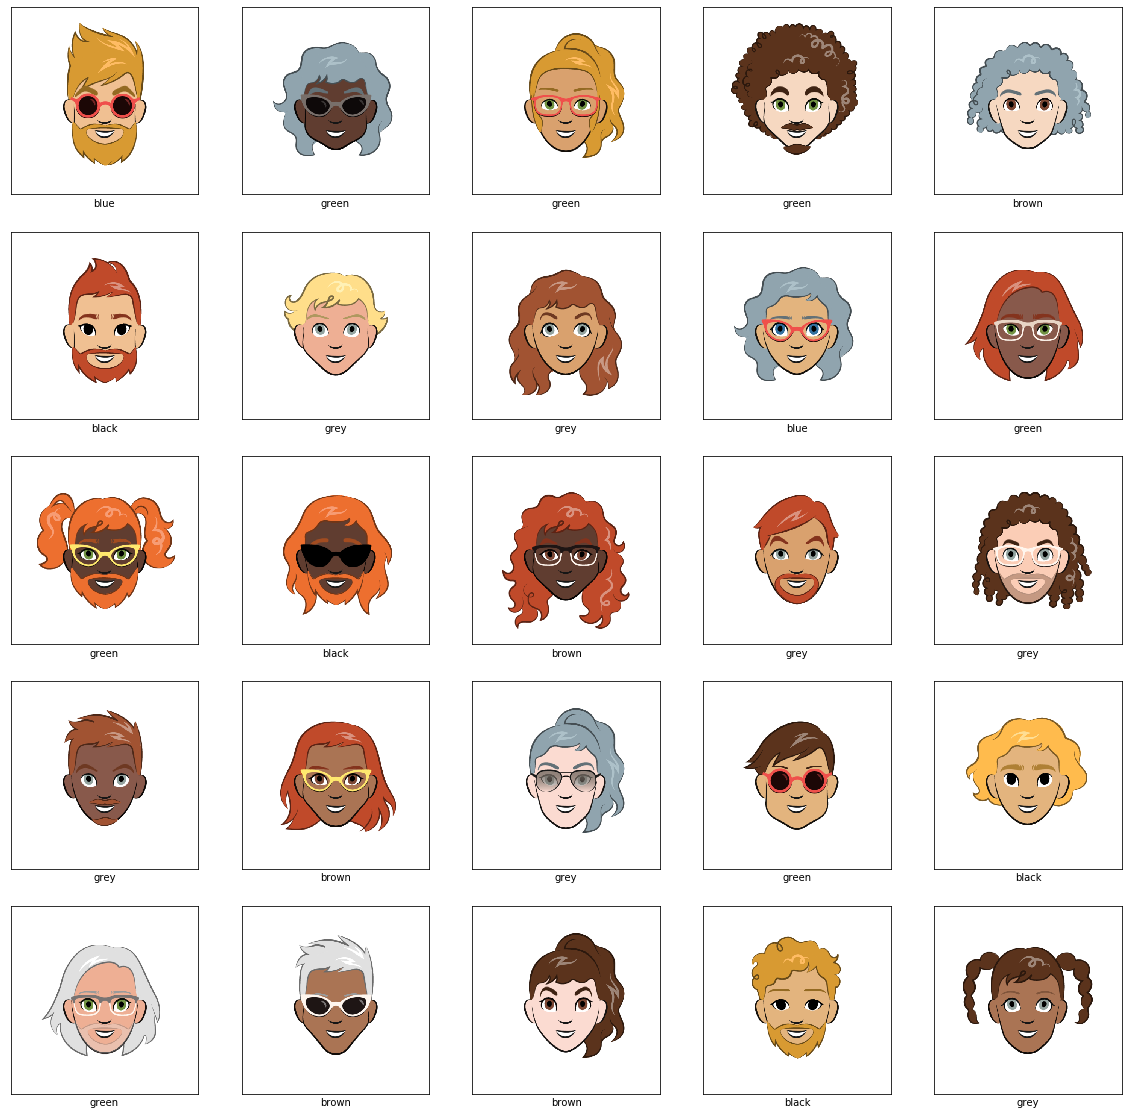

In [21]:
eye_color = {0: "brown", 1: "blue", 2: "green", 3: "grey", 4: "black"}

plt.figure(figsize=(20, 20))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(b2_X_train[i], cmap=plt.cm.binary)
    plt.xlabel(eye_color[int(b2_y_train_raw[i][0])])
plt.show()

Add the convolutional base.

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 498, 498, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 249, 249, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 247, 247, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 123, 123, 64)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 121, 121, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 937024)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [37]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

history = model.fit(
    b2_X_train,
    np.array(b2_y_train_raw)[:, 0].astype(int),
    epochs=10,
    validation_data=(b2_X_test, np.array(b2_y_test_raw)[:, 0].astype(int)),
)

Train on 1000 samples, validate on 1000 samples
Epoch 1/10
1000/1000 [==============================] - 191s 191ms/sample - loss: 0.6156 - accuracy: 0.7820 - val_loss: 0.7172 - val_accuracy: 0.7640
Epoch 2/10
1000/1000 [==============================] - 199s 199ms/sample - loss: 0.3805 - accuracy: 0.8530 - val_loss: 0.7100 - val_accuracy: 0.7700
Epoch 3/10
1000/1000 [==============================] - 198s 198ms/sample - loss: 0.2786 - accuracy: 0.8940 - val_loss: 0.7484 - val_accuracy: 0.7790
Epoch 4/10
  32/1000 [..............................] - ETA: 3:47

KeyboardInterrupt: 

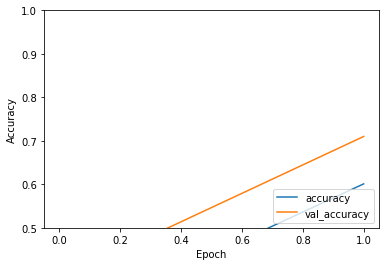

In [39]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc="lower right")

# test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [48]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 5 classes
predictions = Dense(5, activation='softmax')(x)

# this is the model we will train
my_model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
my_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
# my_model.fit_generator(...)

# # at this point, the top layers are well trained and we can start fine-tuning
# # convolutional layers from inception V3. We will freeze the bottom N layers
# # and train the remaining top layers.

# # let's visualize layer names and layer indices to see how many layers
# # we should freeze:
# for i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

# # we chose to train the top 2 inception blocks, i.e. we will freeze
# # the first 249 layers and unfreeze the rest:
# my_for layer in model.layers[:249]:
#    layer.trainable = False
# my_for layer in model.layers[249:]:
#    layer.trainable = True

# # we need to recompile the model for these modifications to take effect
# # we use SGD with a low learning rate
# from keras.optimizers import SGD
# my_model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# # we train our model again (this time fine-tuning the top 2 inception blocks
# # alongside the top Dense layers
# my_model.fit_generator(...)

87916544/87910968 [==============================] - 14s 0us/step


In [65]:
enc = sklearn.preprocessing.LabelBinarizer()
enc.fit(np.array(b2_y_test_raw)[:, 0].astype(int))
enc.transform(np.array(b2_y_test_raw)[:, 0].astype(int))

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [71]:
my_model.fit(b2_X_test, enc.transform(np.array(b2_y_test_raw)[:, 0].astype(int)), epochs=10)

Epoch 1/10
1000/1000 [==============================] - 223s 223ms/step - loss: 1.9803
Epoch 2/10
1000/1000 [==============================] - 223s 223ms/step - loss: 1.8244
Epoch 3/10
1000/1000 [==============================] - 220s 220ms/step - loss: 1.6434
Epoch 4/10
  32/1000 [..............................] - ETA: 3:26 - loss: 1.9488

KeyboardInterrupt: 

In [78]:
result = my_model.evaluate(b2_X_test[:100], enc.transform(np.array(b2_y_test_raw)[:, 0].astype(int))[:100])

100/100 [==============================] - 24s 239ms/step


In [81]:
logits = my_model.predict(b2_X_test[:100])

In [96]:
m = tf.keras.metrics.CategoricalAccuracy() 
m.update_state(enc.transform(np.array(b2_y_test_raw)[:, 0].astype(int))[:100], logits)
m.result().numpy() 

0.26

## Print out your results with following format

In [ ]:
print(
    "TA1:{},{};TA2:{},{};TB1:{},{};TB2:{},{};".format(
        acc_A1_train,
        acc_A1_test,
        acc_A2_train,
        acc_A2_test,
        acc_B1_train,
        acc_B1_test,
        acc_B2_train,
        acc_B2_test,
    )
)